## Лабораторна робота №1 “Linear Regression”
## Зелінського А.С., групи КН-32, 3 курсу

Почнемо з імпорту необхідних бібліотек

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Маємо функцію розрахунку середньоквадратичної помилки, що залежить від вхідних значень Х, У, а також від b0 та b1, що позначають параметри прямої лінійної регресії (b0 - відступ відносно осі У, b1 - кут нахилу)

In [19]:
# середньоквадратична помилка
def leastSquares(x, y, b):
    return np.sum((y - (b[0] + b[1] * x)) ** 2)

Далі представлена функція побудови лінійної регресії. ЇЇ алгоритм роботи такий:
- знаходження імовірного У відносно парамтерів b0 та b1 
- знаходження різниці реального значення та перебаченого
- обрахунок похідних (для градієнту)
- оновлення значень b0 та b1 (включаючи величину вектора через гіперпараметр alfa)

В результаті маємо пройтися певну кількість епох слідуючи цьому алгоритму, аби досягти кращого результату

In [3]:
# лінійна регресія
def linearRegression(x, y, alfa=0.13, epochs=1000, step=100):
    b0, b1 = 0.0, 0.0
    m = len(x)
    for e in range(epochs):
        # передбачене значення у
        y_pred = b0 + b1 * x
        # різниця з реальним значенням
        error = y_pred - y

        # похідні для градієнта
        der_b0 = 1 / m * np.sum(error)
        der_b1 = 1 / m * np.sum(error * x)

        # оновлення значень beta
        b0 -= alfa * der_b0
        b1 -= alfa * der_b1

        # підрахунок середньоквадратичної помилки
        mse = np.mean((y_pred - y) ** 2)
        if e % step == 0:
            print(f"Epoch {e}: b0={b0:.5f}, b1={b1:.5f}, MSE={mse:.6f}")

    return b0, b1

Маючи готові функції можна будувати модель. Для цього витягуємо дані з файлу тренування

In [4]:
# витягуємо тренувальні дані з csv фалу...
train_data = np.loadtxt("lab_1_train.csv", delimiter=",", skiprows=1)
# послідовно у 3 масиви в порядку - index, x, y та...
# транспонуємо для горизонтального розміщення
idx, X, Y = train_data.T

Переглянемо графік:

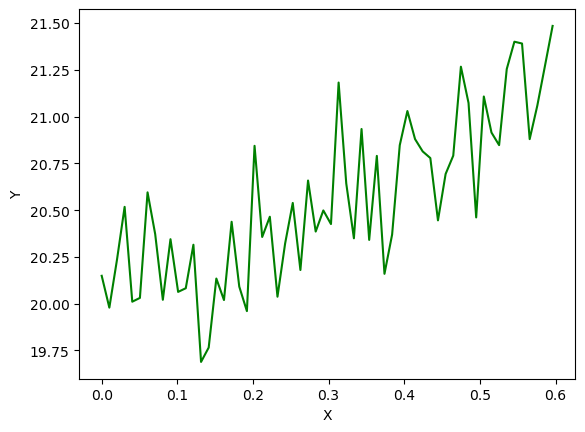

In [5]:
# налаштування графіку тренувальної моделі
plt.plot(X, Y, color="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Тренуємо нашу модель для знаходження кращої пари значень b0 та b1

In [6]:
# тренування системи
b0, b1 = linearRegression(X, Y)

Epoch 0: b0=2.67144, b1=0.80391, MSE=422.477402
Epoch 100: b0=19.15752, b1=4.59609, MSE=0.284705
Epoch 200: b0=19.40300, b1=3.79539, MSE=0.175005
Epoch 300: b0=19.57337, b1=3.23965, MSE=0.122158
Epoch 400: b0=19.69163, b1=2.85392, MSE=0.096700
Epoch 500: b0=19.77371, b1=2.58619, MSE=0.084435
Epoch 600: b0=19.83068, b1=2.40037, MSE=0.078527
Epoch 700: b0=19.87022, b1=2.27140, MSE=0.075681
Epoch 800: b0=19.89766, b1=2.18188, MSE=0.074310
Epoch 900: b0=19.91671, b1=2.11975, MSE=0.073649


Як видно з результату - похибка впродовж часу зменшується, а тому значення шуканої пари все ближче до іделального

Тепер проведемо тестування моделі, аби побачити наскільки вдало були підібрані параметри

In [20]:
# витягуємо тестові дані з csv фалу
test_data = np.loadtxt("lab_1_test.csv", delimiter=",", skiprows=1)
idx_t, X_t, Y_t = test_data.T

Маємо ось таку похибку

In [8]:
print(leastSquares(X_t, Y_t, (b0, b1)))

2.945096015320873


Проведемо експеримент, нехай кількість епох буде 100, замість стандартних 1000

In [9]:
b0, b1 = linearRegression(X, Y, epochs=100)
print(leastSquares(X_t, Y_t, (b0, b1)))

Epoch 0: b0=2.67144, b1=0.80391, MSE=422.477402
70.025301849964


Чітко видно недонавчання моделі, бо замість звичних 2.945..., ми отримали похибку більшу 70

Спробуємо провести 1 млн. епох і побачити, що отримаємо

In [12]:
b0, b1 = linearRegression(X, Y, epochs=1_000_000, step=50_000)
print(leastSquares(X_t, Y_t, (b0, b1)))

Epoch 0: b0=2.67144, b1=0.80391, MSE=422.477402
Epoch 50000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 100000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 150000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 200000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 250000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 300000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 350000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 400000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 450000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 500000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 550000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 600000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 650000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 700000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 750000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 800000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 850000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 900000: b0=19.95993, b1=1.97878, MSE=0.073035
Epoch 950000: b0=

Дуже добре прослідковуєтсья те, що у нас дуже вкрай різниця значень між епохами, а також помітно дещо інше - перевивчення моделі. Замість найменшого досягнутого значення похибки 2.945... ми отримали 3.023...
Тобто, модель звикла до своїх тренувальних даних й не дуже добре працює із тестовими

Виведемо фінальний графік, аби побачити алгоритм наочно

Epoch 0: b0=2.67144, b1=0.80391, MSE=422.477402
Epoch 100: b0=19.15752, b1=4.59609, MSE=0.284705
Epoch 200: b0=19.40300, b1=3.79539, MSE=0.175005
Epoch 300: b0=19.57337, b1=3.23965, MSE=0.122158
Epoch 400: b0=19.69163, b1=2.85392, MSE=0.096700
Epoch 500: b0=19.77371, b1=2.58619, MSE=0.084435
Epoch 600: b0=19.83068, b1=2.40037, MSE=0.078527
Epoch 700: b0=19.87022, b1=2.27140, MSE=0.075681
Epoch 800: b0=19.89766, b1=2.18188, MSE=0.074310
Epoch 900: b0=19.91671, b1=2.11975, MSE=0.073649
2.945096015320873


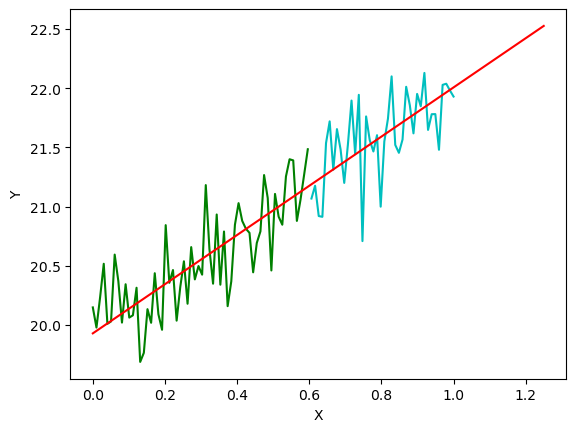

In [17]:
b0, b1 = linearRegression(X, Y, step=100)
print(leastSquares(X_t, Y_t, (b0, b1)))

# налаштування виведення графіку лінійної регресії
X_b = [0, 1.25]
Y_b = [b0 + b1 * xi for xi in X_b]

# виведення усіх графіків
plt.plot(X, Y, color="g")
plt.plot(X_t, Y_t, color="c")
plt.plot(X_b, Y_b, color="r")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()